In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

In [27]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Customer_support_data.csv")

In [28]:
# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/20

In [29]:
# Get a summary of the data
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  

In [30]:
# Get descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
                                   Unique id channel_name category  \
count                                  85907        85907    85907   
unique                                 85907            3       12   
top     07c7a878-0d5a-42e0-97ef-de59abec0238      Inbound  Returns   
freq                                       1        68142    44097   
mean                                     NaN          NaN      NaN   
std                                      NaN          NaN      NaN   
min                                      NaN          NaN      NaN   
25%                                      NaN          NaN      NaN   
50%                                      NaN          NaN      NaN   
75%                                      NaN          NaN      NaN   
max                                      NaN          NaN      NaN   

                  Sub-category Customer Remarks  \
count                    85907            28742   
unique                      57  

In [31]:
# Drop columns that are not useful for the analysis.
df = df.drop(columns=['Unique id', 'Customer Remarks', 'Order_id', 'order_date_time'])

In [32]:
# Convert date columns to datetime objects
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M')

In [33]:
# Handle missing values. For simplicity, we'll fill categorical columns with 'Unknown'.
for col in ['Customer_City', 'Product_category', 'Item_price']:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna('Unknown')
        else:
            # For numerical columns, fill with the mean or median
            df[col] = df[col].fillna(df[col].median())

In [34]:
# Create a new feature: 'Resolution_Time_Minutes'
df['Resolution_Time_Minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

In [35]:
# Check for remaining missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
channel_name                   0
category                       0
Sub-category                   0
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City                  0
Product_category               0
Item_price                     0
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
Resolution_Time_Minutes        0
dtype: int64


Text(0.5, 0.98, 'Key Insights from Customer Support Data')

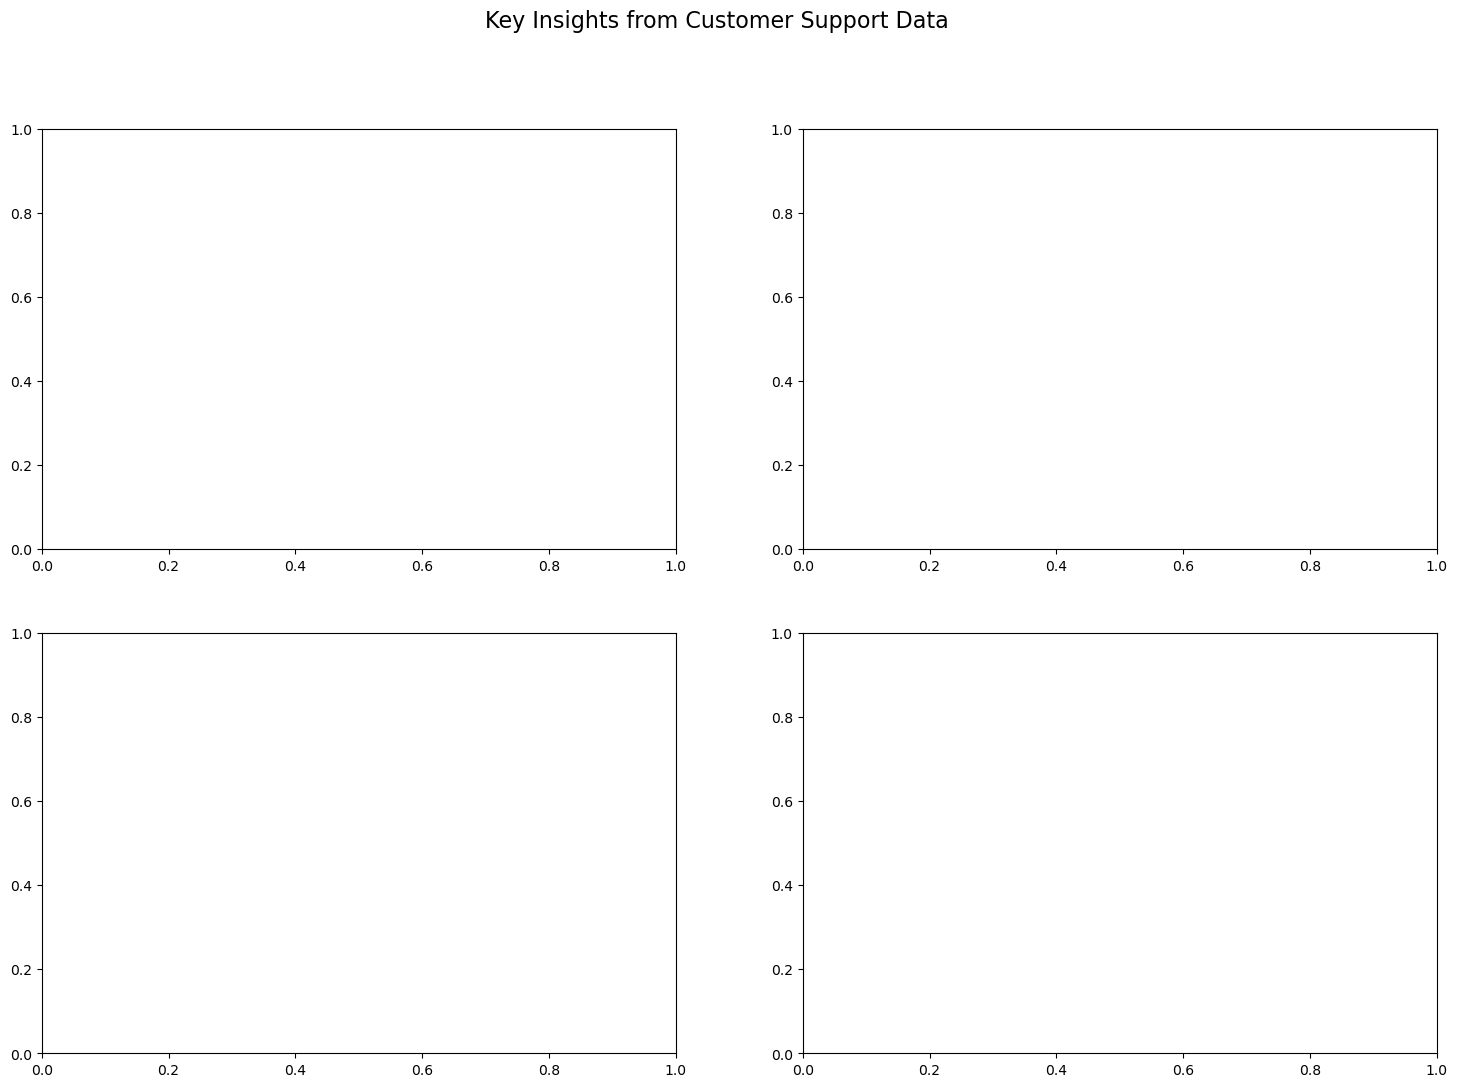

In [36]:
# Create a figure with a few subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Key Insights from Customer Support Data', fontsize=16)


In [37]:
# Plot 1: Distribution of CSAT Scores
sns.countplot(x='CSAT Score', data=df, ax=axes[0, 0], hue='CSAT Score', legend=False, palette='viridis')
axes[0, 0].set_title('Distribution of CSAT Scores')
axes[0, 0].set_xlabel('CSAT Score')
axes[0, 0].set_ylabel('Number of Customers')

Text(4.444444444444452, 0.5, 'Number of Customers')

In [38]:
# Plot 2: Customer Satisfaction by Channel
sns.boxplot(x='channel_name', y='CSAT Score', data=df, ax=axes[0, 1], hue='channel_name', legend=False, palette='pastel')
axes[0, 1].set_title('Customer Satisfaction by Channel')
axes[0, 1].set_xlabel('Channel Name')
axes[0, 1].set_ylabel('CSAT Score')

Text(765.3535353535352, 0.5, 'CSAT Score')

In [39]:
# Plot 3: Top 10 Product Categories by complaint volume
top_categories = df['Product_category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, ax=axes[1, 0], hue=top_categories.index, legend=False, palette='magma')
axes[1, 0].set_title('Top 10 Product Categories by Complaint Volume')
axes[1, 0].set_xlabel('Number of Complaints')
axes[1, 0].set_ylabel('Product Category')

Text(4.444444444444452, 0.5, 'Product Category')

In [41]:
# Plot 4: Relationship between Resolution Time and CSAT Score
sns.scatterplot(x='Resolution_Time_Minutes', y='CSAT Score', data=df, ax=axes[1, 1], alpha=0.5)
axes[1, 1].set_title('Resolution Time vs. CSAT Score')
axes[1, 1].set_xlabel('Resolution Time (minutes)')
axes[1, 1].set_ylabel('CSAT Score')
axes[1, 1].set_xlim(0, 1000) # Limit x-axis to a reasonable range for better visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 640x480 with 0 Axes>